In [ ]:
# Importamos librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd
import sklearn

from sklearn import datasets

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size']=15

In [ ]:
iris = datasets.load_iris()

# DataFrame con los feature names.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# DataFrame con los targets 
target = pd.DataFrame(data=iris.target, columns=['species'])

data = pd.concat([data, target], axis=1)

# ramdom
data = data.sample(frac=1, random_state=1234)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


In [ ]:
data.shape

(150, 5)

In [ ]:
Ntrain = int(data.shape[0] * 0.8)

train = data.iloc[:Ntrain, :]

test = data.iloc[Ntrain:, :]

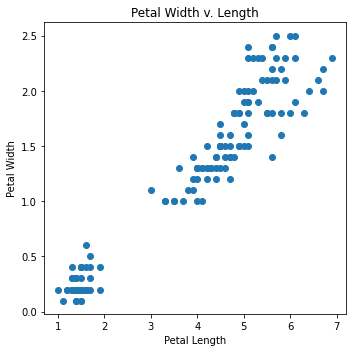

In [ ]:

plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la gráfica comparando Petal lenght (eje x) contra Petal width (eje y)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

#Regresión Lineal

In [ ]:

model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\nBias\n", model_1.intercept_)
print(f'\nFunción = {model_1.coef_}x {model_1.intercept_}')

Coef
 [0.41490802]

Bias
 -0.357589314248546

Función = [0.41490802]x -0.357589314248546


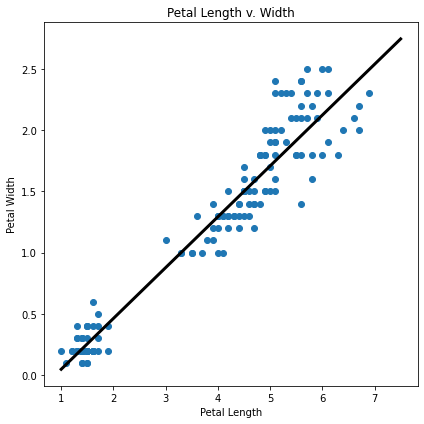

In [ ]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = 0.4149*xvals - 0.3675

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

In [ ]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
y_predict = model_1.predict(pd.DataFrame(test.iloc[:,2]))

# Calculamos el MSE con los valores predichos en y.
print('El error cuadratico medio es de: ',round(mean_squared_error(test.iloc[:,3],y_predict),3))

# Calculamos R^2 con los valores predichos en y
print('R^2 es de: ',round(r2_score(test.iloc[:, 3],y_predict),3))




El error cuadratico medio es de:  0.043
R^2 es de:  0.937


#Regresión logística

In [ ]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
model_2 = linear_model.LogisticRegression(max_iter=110)
model_2.fit(x_train,y_train)

LogisticRegression(max_iter=110)

In [ ]:
y_pred = model_2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

#Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [ ]:
y_pred_RM = clf.predict(x_test)

In [ ]:
print("Testing accuracy =",accuracy_score(y_test,y_pred_RM))

Testing accuracy = 0.9666666666666667


#K-Means clustering

In [ ]:
kmodel = KMeans(n_clusters=3,random_state=42)
kmodel.fit(data[['petal length (cm)','petal width (cm)']])

KMeans(n_clusters=3, random_state=42)

In [ ]:
print('Inertia: ',round(kmodel.inertia_,3))

Inertia:  31.371


In [ ]:
centroides = kmodel.cluster_centers_
print('Centroids (x,y): \n', centroides)

Centroids (x,y): 
 [[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]


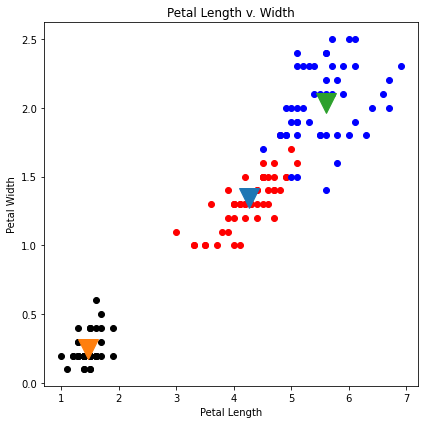

In [ ]:
from numpy.core.fromnumeric import size
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(1,1,1)
#setosa
ax.scatter(data[data.iloc[:,-1]==0]['petal length (cm)'],
           data[data.iloc[:,-1]==0]['petal width (cm)'],
           c = 'k')
#versicolor
ax.scatter(data[data.iloc[:,-1]==1]['petal length (cm)'],
           data[data.iloc[:,-1]==1]['petal width (cm)'],
           c = 'r')
#virginica
ax.scatter(data[data.iloc[:,-1]==2]['petal length (cm)'],
           data[data.iloc[:,-1]==2]['petal width (cm)'],
           c = 'b')

#Centroides
ax.plot(centroides[0,0],centroides[0,1],"v", markersize=20)
ax.plot(centroides[1,0],centroides[1,1],"v", markersize=20)
ax.plot(centroides[2,0],centroides[2,1],"v", markersize=20)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()